In [1]:
pip install mord

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart,  liftChart
from dmba.metric import AIC_score

In [3]:
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [4]:
tayko_df = pd.read_csv('Tayko.csv')

In [5]:
#shape of the tayko_df
tayko_df.shape

(2000, 25)

In [7]:
#Records from the df
tayko_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [8]:
#Data types
tayko_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [10]:
#Renaming column name
tayko_df = tayko_df.rename(columns={'Web order': 'Web_order'})

In [11]:
#Descriptive Statistics
tayko_df.describe()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res,Purchase,Spending
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,0.824500,0.126500,0.056000,0.060000,0.041500,0.151000,0.01650,0.033500,0.052500,...,0.018000,0.137500,1.417000,2155.101000,2435.601500,0.426000,0.524500,0.221000,0.500000,102.62500
std,577.494589,0.380489,0.332495,0.229979,0.237546,0.199493,0.358138,0.12742,0.179983,0.223089,...,0.132984,0.344461,1.405738,1141.302846,1077.872233,0.494617,0.499524,0.415024,0.500125,186.78261
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1133.000000,1671.250000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1000.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2280.000000,2721.000000,0.000000,1.000000,0.000000,0.500000,2.00000
75%,1500.250000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,2.000000,3139.250000,3353.000000,1.000000,1.000000,0.000000,1.000000,153.00000
max,2000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000,1.000000,1500.00000


In [12]:
#checking null values
tayko_df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web_order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

In [13]:
#removing variables from df
tayko_df = tayko_df.drop(['Spending', 'sequence_number'], axis=1)

In [14]:
tayko_df.head()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,2,3662,3662,1,0,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,2900,2900,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3883,3914,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,829,829,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,869,869,0,0,0,0


In [15]:
#number of unique values in each variable
tayko_df.nunique()

US                        2
source_a                  2
source_c                  2
source_b                  2
source_d                  2
source_e                  2
source_m                  2
source_o                  2
source_h                  2
source_r                  2
source_s                  2
source_t                  2
source_u                  2
source_p                  2
source_x                  2
source_w                  2
Freq                     15
last_update_days_ago    940
1st_update_days_ago     923
Web_order                 2
Gender=male               2
Address_is_res            2
Purchase                  2
dtype: int64

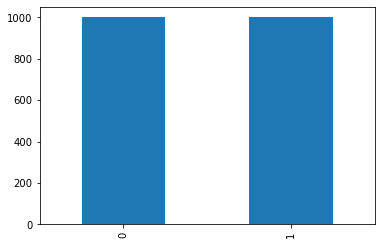

In [16]:
#bar graph of 'Purchase' variable
tayko_df['Purchase'].value_counts().plot(kind='bar');

<AxesSubplot:xlabel='last_update_days_ago', ylabel='1st_update_days_ago'>

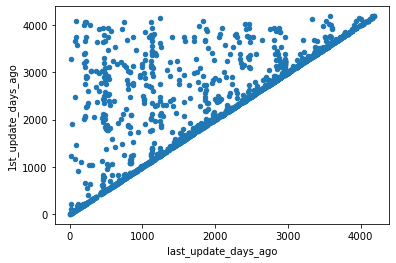

In [17]:
#scatter plot with axes names
tayko_df.plot.scatter(x='last_update_days_ago', y='1st_update_days_ago', legend=False)

Text(0, 0.5, 'Count')

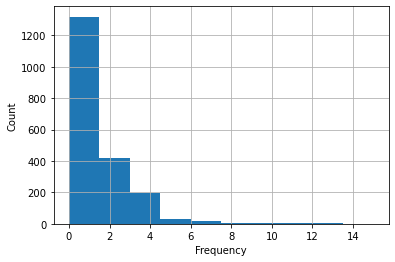

In [18]:
#histogram of Frequency variable
ax = tayko_df.Freq.hist()
ax.set_xlabel('Frequency'); ax.set_ylabel('Count')

<AxesSubplot:>

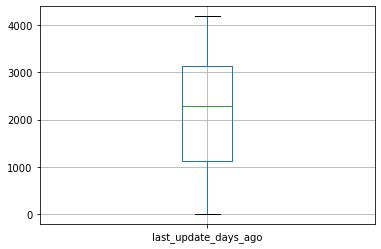

In [19]:
#last_update_days box plot
tayko_df.boxplot(column='last_update_days_ago')

<AxesSubplot:>

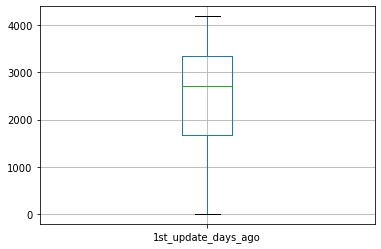

In [20]:
#1st update days box plot
tayko_df.boxplot(column='1st_update_days_ago')

# Correlation

In [21]:
#initialising
corr = tayko_df.corr()
corr

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res,Purchase
US,1.000000,0.104397,0.083786,-0.032876,0.096000,-0.088102,0.049440,0.005541,0.008413,0.036651,...,-0.015216,0.062463,-0.205108,0.033078,0.038161,0.075981,0.004056,0.026582,0.020816,0.022345
source_a,0.104397,1.000000,-0.092688,-0.096145,-0.079185,-0.160490,-0.049291,-0.070849,-0.089579,-0.103197,...,-0.029566,-0.051522,-0.151945,0.177130,0.110529,0.232649,0.055428,0.037051,-0.021436,0.212086
source_c,0.083786,-0.092688,1.000000,-0.061535,-0.050680,-0.102717,-0.031547,-0.045345,-0.057332,-0.066048,...,-0.018923,-0.032975,-0.097248,0.012837,-0.168146,-0.167240,0.018857,0.001115,-0.045870,-0.052192
source_b,-0.032876,-0.096145,-0.061535,1.000000,-0.052570,-0.106548,-0.032724,-0.047036,-0.059471,-0.068512,...,-0.019629,-0.034205,-0.100875,-0.065975,0.249488,0.248653,-0.009026,0.000253,-0.083825,-0.101058
source_d,0.096000,-0.079185,-0.050680,-0.052570,1.000000,-0.087753,-0.026951,-0.038739,-0.048980,-0.056426,...,-0.016166,-0.028171,-0.083081,0.047074,0.136176,0.149448,-0.006885,0.002342,-0.050409,0.027577
source_e,-0.088102,-0.160490,-0.102717,-0.106548,-0.087753,1.000000,-0.054625,-0.078516,-0.099272,-0.114364,...,-0.032766,-0.057097,-0.168386,-0.047629,0.073953,0.051849,-0.035729,-0.017893,-0.039519,-0.047480
source_m,0.049440,-0.049291,-0.031547,-0.032724,-0.026951,-0.054625,1.000000,-0.024114,-0.030489,-0.035124,...,-0.010063,-0.017536,-0.051716,0.000667,-0.018838,-0.028035,-0.016335,0.021154,-0.002772,0.019625
source_o,0.005541,-0.070849,-0.045345,-0.047036,-0.038739,-0.078516,-0.024114,1.000000,-0.043824,-0.050487,...,-0.014465,-0.025206,-0.074335,-0.122466,0.185766,0.226457,-0.019904,0.004777,-0.052284,-0.113928
source_h,0.008413,-0.089579,-0.057332,-0.059471,-0.048980,-0.099272,-0.030489,-0.043824,1.000000,-0.063833,...,-0.018288,-0.031869,-0.093986,0.112004,-0.130604,-0.169287,-0.053179,-0.036238,0.404118,-0.181587
source_r,0.036651,-0.103197,-0.066048,-0.068512,-0.056426,-0.114364,-0.035124,-0.050487,-0.063833,1.000000,...,-0.021069,-0.036714,-0.108274,0.013903,-0.043851,-0.046817,-0.005452,-0.015285,0.046384,0.021773


<AxesSubplot:>

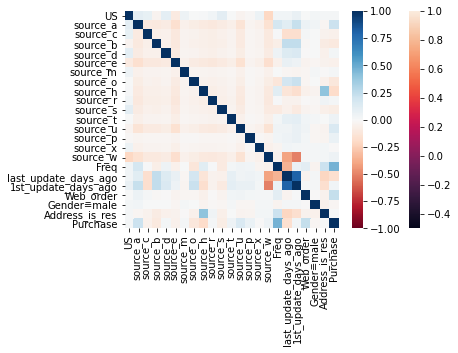

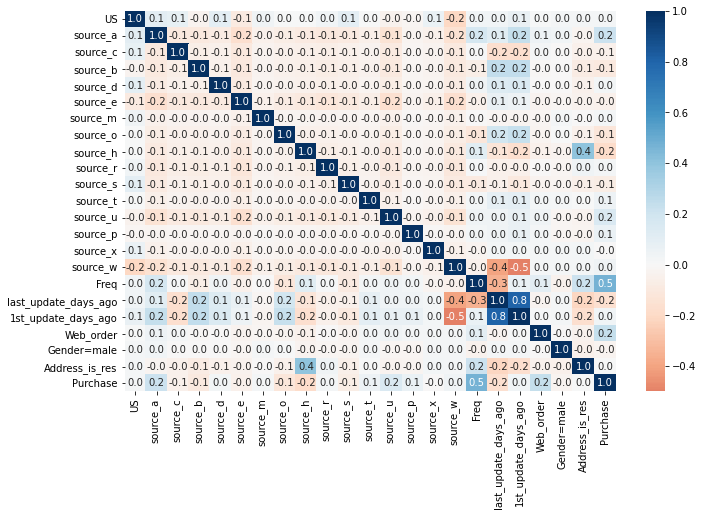

In [22]:
#simple heatmap of correlations
sns.heatmap(corr, xticklabels=corr.columns,
yticklabels=corr.columns)
sns.heatmap (corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)

sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0,
ax=ax)


# PCA

In [23]:
pcs = PCA()
pcs.fit(tayko_df)

PCA()

In [24]:
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1492.2227,487.4968,1.0578,0.5286,0.4998,0.4274,0.405,0.3851,0.369,0.3479,...,0.2279,0.2229,0.2034,0.1931,0.1678,0.1514,0.1377,0.1297,0.0805,0.0506
Proportion of variance,0.9036,0.0964,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9036,1.0000,1.0000,1.0000,1.0000,1.0000,1.000,1.0000,1.000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [25]:
#weight generation
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=tayko_df.columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
US,-0.000015,4.841103e-05,0.002079,0.006230,0.046222
source_a,-0.000039,1.364114e-04,0.038905,-0.089416,0.046677
source_c,0.000027,-1.055833e-06,-0.006393,0.004062,0.004909
source_b,-0.000042,2.018795e-06,-0.010330,0.020860,-0.002124
source_d,-0.000020,1.001424e-05,0.014251,0.004197,0.005424
source_e,-0.000016,-2.507465e-05,-0.009560,0.062030,-0.031933
source_m,0.000002,-3.997234e-06,0.001156,0.000723,0.006878
source_o,-0.000026,2.581429e-05,-0.032531,0.012783,-0.004180
source_h,0.000023,-2.995432e-05,0.035817,0.126776,-0.009467
source_r,0.000008,-2.987032e-06,0.003790,0.008456,-0.009219


# Logistic Regression

In [26]:
y = tayko_df['Purchase']
X = tayko_df.drop(columns=['Purchase'])

In [27]:
#data partitioning
train_X, valid_X, train_y, valid_y = train_test_split(X, y, 
   test_size=0.4, random_state=1)

In [29]:
#descriptive statistics
train_X.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,...,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.825000,0.128333,0.062500,0.058333,0.040833,0.171667,0.01750,0.035833,0.044167,0.065000,...,0.105833,0.008333,0.015833,0.130833,1.416667,2143.309167,2445.004167,0.404167,0.514167,0.221667
std,0.380126,0.334600,0.242162,0.234470,0.197986,0.377248,0.13118,0.185952,0.205551,0.246629,...,0.307752,0.090944,0.124882,0.337359,1.420588,1151.831576,1077.501643,0.490935,0.500008,0.415541
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1120.750000,1710.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2281.000000,2714.500000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3126.000000,3339.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,15.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [30]:
train_y.describe()

count    1200.000000
mean        0.484167
std         0.499958
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchase, dtype: float64

In [31]:
valid_X.describe()

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,...,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_order,Gender=male,Address_is_res
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.823750,0.123750,0.046250,0.062500,0.042500,0.120000,0.015000,0.030000,0.06500,0.073750,...,0.138750,0.002500,0.021250,0.147500,1.417500,2172.788750,2421.497500,0.458750,0.540000,0.220000
std,0.381271,0.329502,0.210157,0.242213,0.201853,0.325165,0.121628,0.170694,0.24668,0.261527,...,0.345902,0.049969,0.144307,0.354825,1.384048,1125.810625,1078.948244,0.498607,0.498709,0.414505
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1169.500000,1611.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,2280.000000,2725.500000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,3146.500000,3359.250000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,12.000000,4188.000000,4188.000000,1.000000,1.000000,1.000000


In [32]:
valid_y.describe()

count    800.000000
mean       0.523750
std        0.499748
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Purchase, dtype: float64

In [33]:
#Fit a logistic regression
logit_reg = LogisticRegression(penalty="l2", C=1e42, 
   solver='liblinear')
logit_reg.fit(train_X, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [34]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, 
   index=X.columns))

intercept  -3.352425301409916
                         coeff
US                    0.244289
source_a              1.647094
source_c             -0.561251
source_b             -0.311614
source_d              0.167598
source_e              0.379960
source_m              0.981323
source_o              0.697839
source_h             -3.537767
source_r              0.965342
source_s             -0.000980
source_t              0.863860
source_u              1.691005
source_p              1.998950
source_x              1.105712
source_w              0.767149
Freq                  2.180981
last_update_days_ago  0.000166
1st_update_days_ago  -0.000274
Web_order             0.965675
Gender=male          -0.234322
Address_is_res       -0.529822


In [35]:
print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0], 'Odds': np.exp(logit_reg.coef_[0])}, index=X.columns))

intercept  -3.352425301409916
                         coeff      Odds
US                    0.244289  1.276713
source_a              1.647094  5.191871
source_c             -0.561251  0.570495
source_b             -0.311614  0.732264
source_d              0.167598  1.182461
source_e              0.379960  1.462226
source_m              0.981323  2.667983
source_o              0.697839  2.009406
source_h             -3.537767  0.029078
source_r              0.965342  2.625685
source_s             -0.000980  0.999020
source_t              0.863860  2.372301
source_u              1.691005  5.424931
source_p              1.998950  7.381299
source_x              1.105712  3.021375
source_w              0.767149  2.153618
Freq                  2.180981  8.854985
last_update_days_ago  0.000166  1.000166
1st_update_days_ago  -0.000274  0.999726
Web_order             0.965675  2.626561
Gender=male          -0.234322  0.791107
Address_is_res       -0.529822  0.588710


In [36]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
674,0,9.609708e-01,0.039029,0
1699,1,5.059006e-02,0.949410,1
1282,0,4.784349e-01,0.521565,1
1315,1,1.294670e-08,1.000000,1
1210,0,9.091932e-01,0.090807,0
...,...,...,...,...
1816,0,9.105501e-01,0.089450,0
390,1,5.364415e-01,0.463558,0
1992,1,2.494265e-01,0.750573,1
78,1,3.325376e-01,0.667462,1


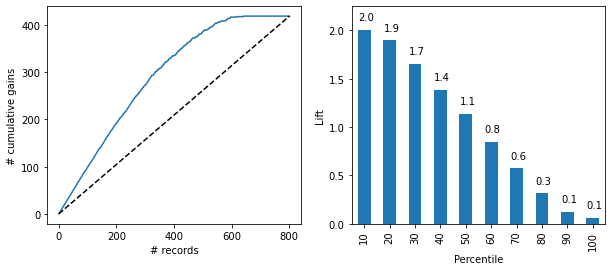

In [37]:
#gains and lift chart for validation results
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.actual, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

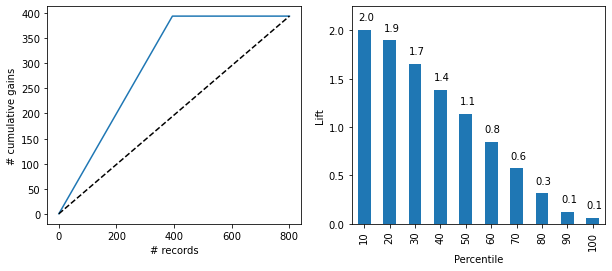

In [38]:
#gains and lift chart for test results
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
gainsChart(df.predicted, ax=axes[0])
liftChart(df['p(1)'], title=False, ax=axes[1])
plt.show()

In [40]:
#confusion matrix
classificationSummary(train_y, logit_reg.predict(train_X))
classificationSummary(valid_y, logit_reg.predict(valid_X))

Confusion Matrix (Accuracy 0.8108)

       Prediction
Actual   0   1
     0 512 107
     1 120 461
Confusion Matrix (Accuracy 0.8187)

       Prediction
Actual   0   1
     0 321  60
     1  85 334
